# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/submission2/dataset/Dataset_inisiasi.csv', delimiter=',')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster,kategori_kesejahteraan
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226.0,1,Menengah
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226.0,1,Menengah
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627.0,1,Menengah
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627.0,1,Menengah
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226.0,3,Menengah


In [4]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   provinsi                2176 non-null   object 
 1   jenis                   2176 non-null   object 
 2   daerah                  2176 non-null   object 
 3   tahun                   2176 non-null   int64  
 4   periode                 2176 non-null   object 
 5   gk                      2176 non-null   float64
 6   ump                     2176 non-null   float64
 7   peng                    2176 non-null   float64
 8   upah                    2176 non-null   float64
 9   cluster                 2176 non-null   int64  
 10  kategori_kesejahteraan  2176 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 187.1+ KB


In [5]:
df.describe(include="all")

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster,kategori_kesejahteraan
count,2176,2176,2176,2176.000000,2176,2176.00000,2.176000e+03,2.176000e+03,2176.000000,2176.000000,2176
unique,34,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,3
top,ACEH,MAKANAN,PERKOTAAN,NaN,MARET,NaN,NaN,NaN,NaN,NaN,Menengah
freq,64,1088,1088,NaN,1088,NaN,NaN,NaN,NaN,NaN,1540
mean,NaN,NaN,NaN,2018.500000,NaN,228034.75653,2.305092e+06,5.680756e+05,16567.495404,1.500000,NaN
std,NaN,NaN,NaN,2.291815,NaN,125437.32211,5.904737e+05,1.695382e+05,4166.747345,1.118291,NaN
min,NaN,NaN,NaN,2015.000000,NaN,48561.00000,9.100000e+05,1.760280e+05,8525.000000,0.000000,NaN
25%,NaN,NaN,NaN,2016.750000,NaN,112453.50000,1.873750e+06,4.353190e+05,13445.500000,0.750000,NaN
50%,NaN,NaN,NaN,2018.500000,NaN,217022.00000,2.267356e+06,5.609150e+05,15856.500000,1.500000,NaN
75%,NaN,NaN,NaN,2020.250000,NaN,326647.75000,2.699206e+06,6.769098e+05,18863.000000,2.250000,NaN


In [6]:
print(f"Jumlah data hilang pada dataset: \n{df.isna().sum()}")

Jumlah data hilang pada dataset: 
provinsi                  0
jenis                     0
daerah                    0
tahun                     0
periode                   0
gk                        0
ump                       0
peng                      0
upah                      0
cluster                   0
kategori_kesejahteraan    0
dtype: int64


In [7]:
print(f"Jumlah data ganda pada dataset: {df.duplicated().sum()}")

Jumlah data ganda pada dataset: 0


In [8]:
numeric_columns = df.select_dtypes(np.number).columns[1:4]
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster,kategori_kesejahteraan
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.523587,-0.686203,-0.600124,11226.0,1,Menengah
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.590815,-0.686203,-0.600124,11226.0,1,Menengah
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.623628,-0.316076,-0.113408,13627.0,1,Menengah
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.731476,-0.316076,-0.113408,13627.0,1,Menengah
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.553744,-0.686203,-1.020297,11226.0,3,Menengah


In [9]:
standardize_df = df.copy()
label_encoders = {col: LabelEncoder() for col in ['daerah', 'jenis', 'kategori_kesejahteraan', 'periode']}
for col, encoder in label_encoders.items():
    standardize_df[col] = encoder.fit_transform(standardize_df[col])

standardize_df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster,kategori_kesejahteraan
0,ACEH,0,1,2015,0,0.523587,-0.686203,-0.600124,11226.0,1,0
1,ACEH,0,1,2015,1,0.590815,-0.686203,-0.600124,11226.0,1,0
2,ACEH,0,1,2016,0,0.623628,-0.316076,-0.113408,13627.0,1,0
3,ACEH,0,1,2016,1,0.731476,-0.316076,-0.113408,13627.0,1,0
4,ACEH,0,0,2015,0,0.553744,-0.686203,-1.020297,11226.0,3,0


In [10]:
standardize_df.drop(columns=["provinsi"], inplace=True)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X, y = standardize_df.drop(columns=["cluster"]), standardize_df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1740, 9), y_train=(1740,)
Test set shape: X_test=(436, 9), y_test=(436,)


**Insight :**
Data telah dibagi menjadi training set dan testing set menggunakan metode `train_test_split` dengan proporsi 80:20. Training set memiliki bentuk `(1740, 9)` untuk fitur (`X_train`) dan `(1740,)` untuk label (`y_train`), sementara testing set berukuran `(436, 9)` untuk fitur (`X_test`) dan `(436,)` untuk label (`y_test`). Stratifikasi dilakukan pada variabel target (`y`) untuk memastikan proporsi kelas tetap seimbang antara training dan testing set.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
nb = GaussianNB()
models = [knn, dt, rf, svm, nb]
model_names = ["K-Nearest Neighbors", "Decision Tree", "Random Forest", "SVM", "Naive Bayes"]
print("Model training selesai.")

Model training selesai.


**Insight :**
Dalam konteks ini, beberapa algoritma seperti K-Nearest Neighbors (KNN) , Decision Tree , Random Forest , SVM , dan Naive Bayes telah dipilih untuk dievaluasi.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm
    }

In [14]:
results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    eval_result = evaluate_model(model, X_test, y_test)
    results.append({
        "Model": name,
        "Accuracy": eval_result["accuracy"],
        "Precision": eval_result["precision"],
        "Recall": eval_result["recall"],
        "F1-Score": eval_result["f1"],
        "Confusion Matrix": eval_result["confusion_matrix"]
    })

summary_df = pd.DataFrame(results)
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  K-Nearest Neighbors  0.094037   0.095603  0.094037  0.091997   
1        Decision Tree  1.000000   1.000000  1.000000  1.000000   
2        Random Forest  1.000000   1.000000  1.000000  1.000000   
3                  SVM  0.243119   0.179398  0.243119  0.193242   
4          Naive Bayes  1.000000   1.000000  1.000000  1.000000   

                                    Confusion Matrix  
0  [[15, 19, 49, 26], [23, 10, 60, 16], [58, 31, ...  
1  [[109, 0, 0, 0], [0, 109, 0, 0], [0, 0, 109, 0...  
2  [[109, 0, 0, 0], [0, 109, 0, 0], [0, 0, 109, 0...  
3  [[0, 63, 21, 25], [0, 64, 28, 17], [0, 65, 21,...  
4  [[109, 0, 0, 0], [0, 109, 0, 0], [0, 0, 109, 0...  


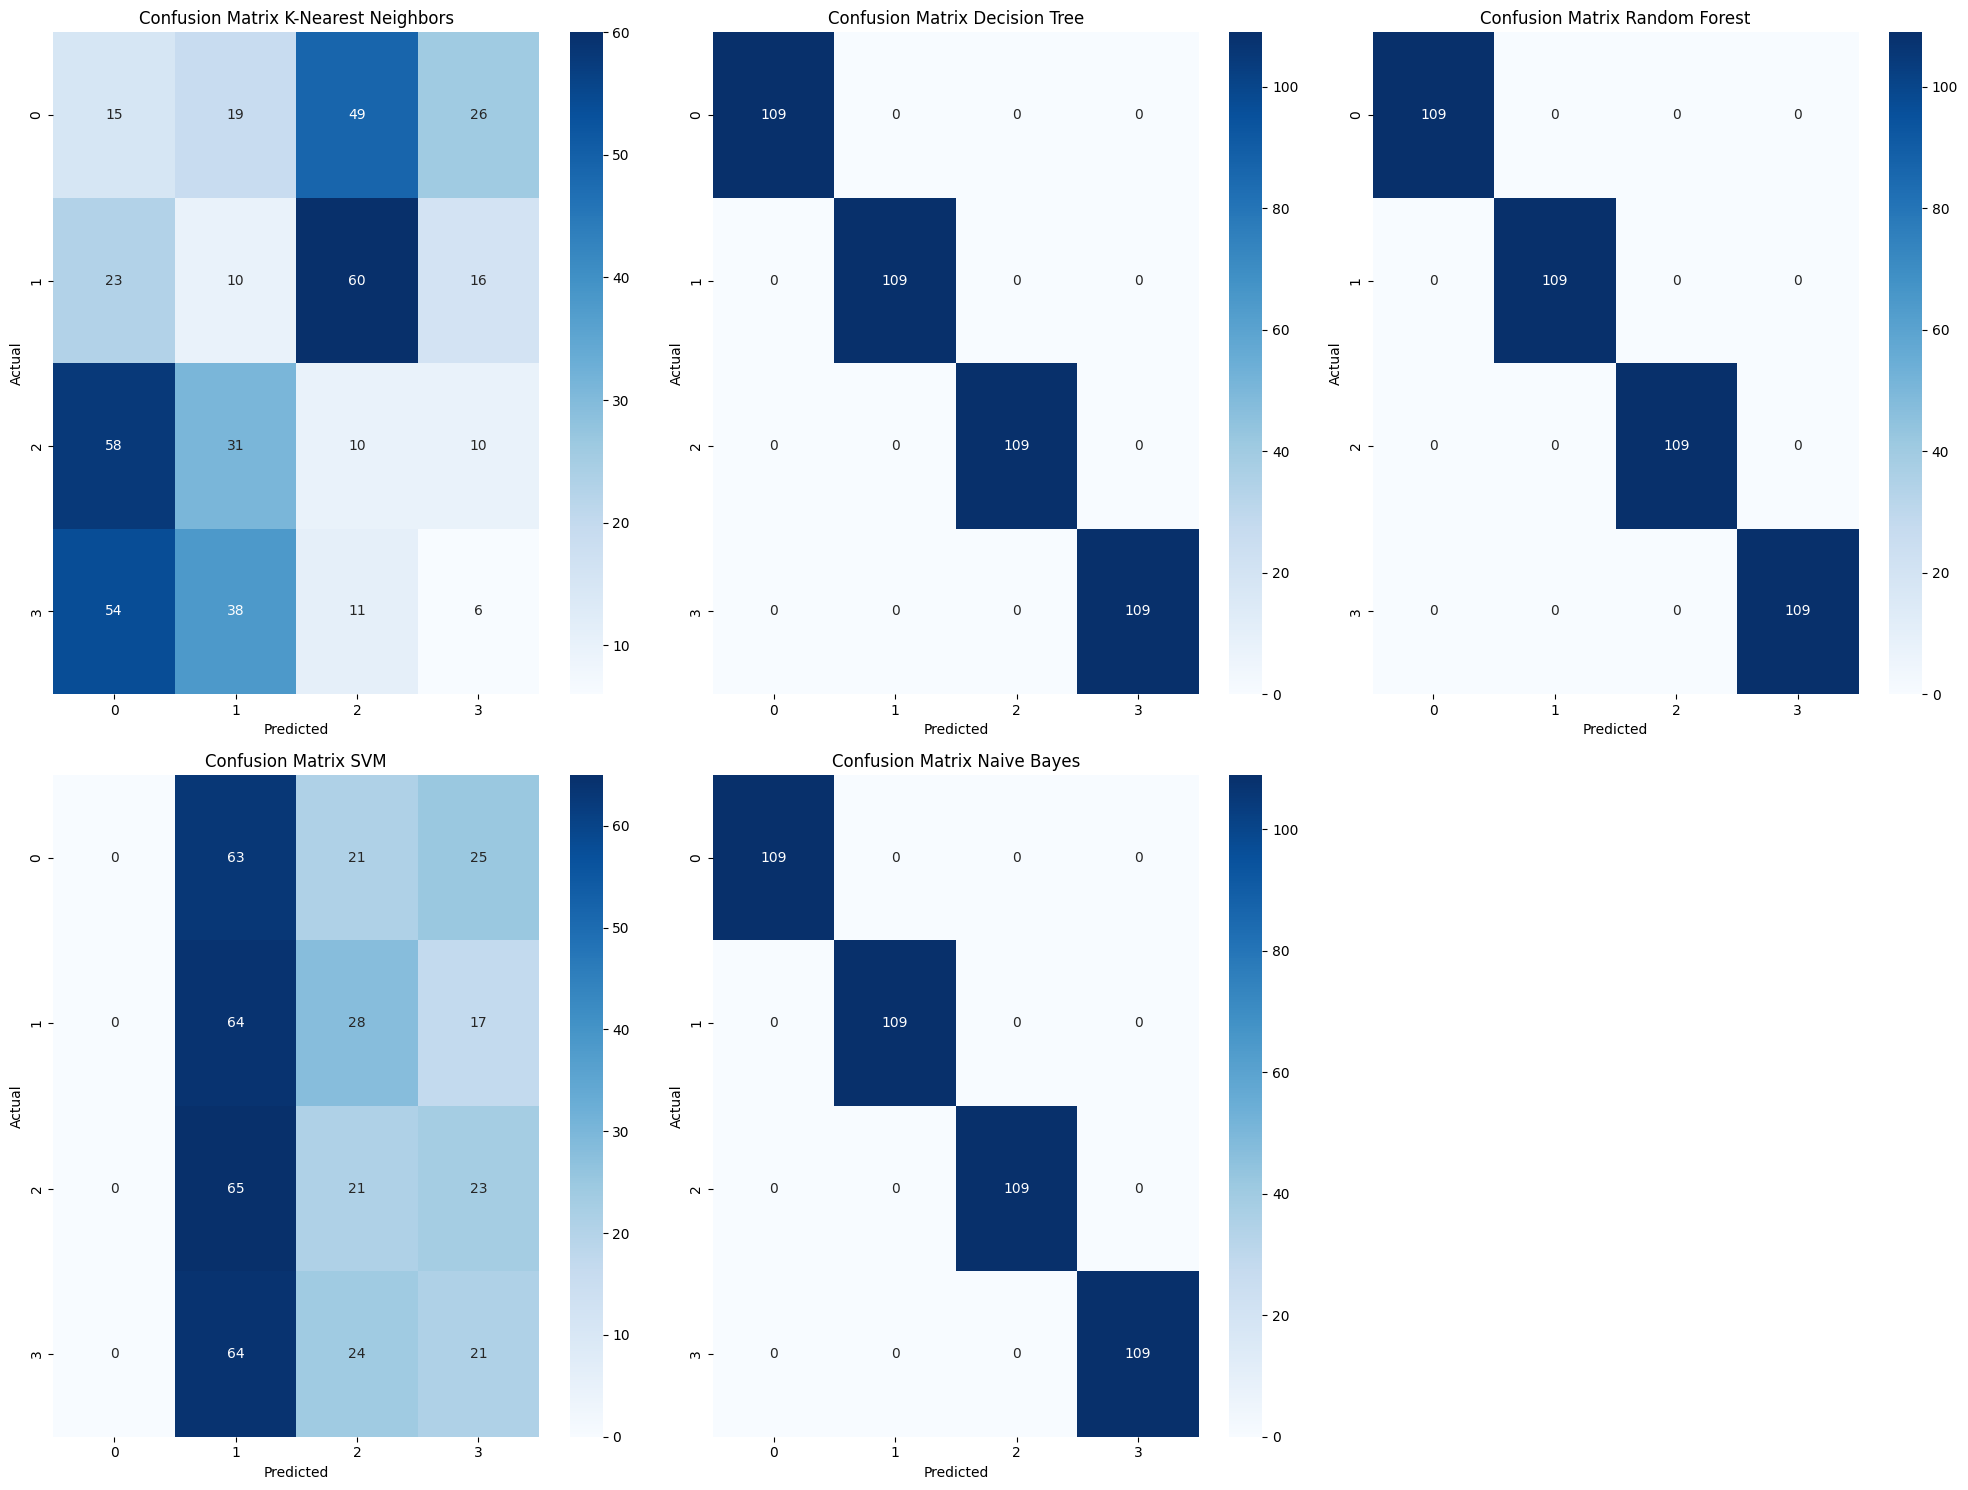

In [15]:
plt.figure(figsize=(20, 15))
for i, model in enumerate(models, start=1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix {model_names[i-1]}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi
  * Decision Tree , Random Forest , dan Naive Bayes mencapai akurasi sempurna (100%) , dengan nilai precision , recall , dan F1-Score juga mencapai 1.0.
  * KNN memiliki akurasi rendah (9.4% ) karena kesulitan dalam membedakan klaster, sementara SVM memiliki akurasi sedang (24.3% ), tetapi masih jauh dari target minimal 92%.
2. Identifikasi kelemahan model, seperti:
    - Overfitting, Model seperti Decision Tree, Random Forest, dan Naive Bayes terindikasi overfitting karena akurasinya sempurna pada data uji.
    - Kinerja Rendah, KNN dan SVM gagal membedakan klaster dengan baik,
3. Rekomendasi saran :
 - Gunakan teknik tuning hyperparameter (misalnya GridSearchCV) untuk meningkatkan performa model seperti KNN dan SVM.